## The Data Set I've worked on is European Soccer Database, https://www.kaggle.com/hugomathien/soccer

#### Our main question is to answer wether Fifa's team attributes reflects on team results and total wins or not so we can predict each team's total wins from it's gathered team attributes scales? Then exploring if there's improvment in team attributes over years? 

In [ ]:
#importing important libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline
# Making a connection cursor with sql table
sqliteConnection = sqlite3.connect('database.sqlite')
cur = sqliteConnection.cursor()
tables = cur.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
tables_names = sorted(list(zip(*tables))[0])
print(tables_names)
# Extracting each table in a dataframe
Country = pd.read_sql_query("SELECT * from Country", sqliteConnection)
League = pd.read_sql_query("SELECT * from League", sqliteConnection)
Match = pd.read_sql_query("SELECT * from Match", sqliteConnection)
Player = pd.read_sql_query("SELECT * from Player", sqliteConnection)
Player_Attributes = pd.read_sql_query("SELECT * from Player_Attributes", sqliteConnection)
Team = pd.read_sql_query("SELECT * from Team", sqliteConnection)
Team_Attributes = pd.read_sql_query("SELECT * from Team_Attributes", sqliteConnection)

In [252]:
#"The maximum width in characters of a column"
pd.set_option('display.max_rows', 500)
# Exploring how many values are null valued in Matches dataset
print(Match.isnull().sum())
print(Match.info())
Match.head()

id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_X1       1821
home_player_X2       1821
home_player_X3       1832
home_player_X4       1832
home_player_X5       1832
home_player_X6       1832
home_player_X7       1832
home_player_X8       1832
home_player_X9       1832
home_player_X10      1832
home_player_X11      1832
away_player_X1       1832
away_player_X2       1832
away_player_X3       1832
away_player_X4       1832
away_player_X5       1832
away_player_X6       1832
away_player_X7       1832
away_player_X8       1832
away_player_X9       1833
away_player_X10      1833
away_player_X11      1839
home_player_Y1       1821
home_player_Y2       1821
home_player_Y3       1832
home_player_Y4       1832
home_player_Y5       1832
home_player_

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [379]:
# Extracing the most important columns which Doesn't contain any null values
Match_cleaned=Match.loc[:,'id':'away_team_goal']
Match_cleaned.info()
# Checking the data type of each column
for col in Match_cleaned.columns:
    print(col, type(Match_cleaned[col].iloc[0]))
# Converting thae date column to datetime datatype to be able to use it 
Match_cleaned['date']= pd.to_datetime(Match_cleaned['date'])
# Extrating year in a column so we would be able to merge it with team Attributes data frame which is measured yearly
Match_cleaned['year']=Match_cleaned['date'].dt.year
# Adding new columns with a value True to disgniush if each team won home or away or finished his game draw
Match_cleaned.loc[Match_cleaned['home_team_goal']>Match_cleaned['away_team_goal'], 'home_win'] = True  
Match_cleaned.loc[Match_cleaned['away_team_goal']>Match_cleaned['home_team_goal'], 'away_win'] = True
Match_cleaned.loc[Match_cleaned['away_team_goal']==Match_cleaned['home_team_goal'], 'draw'] = True
# making sure new columns added succcesfully
print(Match_cleaned.head())
#counting Each team's wins per year in home, and total goals scored at his home in a new data frame grouped by home team name and year
home_wins = Match_cleaned.groupby(['home_team_api_id','year'])['home_win'].count()
home_goals = Match_cleaned.groupby(['home_team_api_id','year'])['home_team_goal'].count()
print(home_wins.head())
#counting Each team's wins per year in away, and total goals scored away in a new data frame grouped by away team name and year
away_wins = Match_cleaned.groupby(['away_team_api_id','year'])['away_win'].agg('count')
away_goals= Match_cleaned.groupby(['away_team_api_id','year'])['away_team_goal'].agg('count')
# calculting total goals scored by each team each year, home and away and adding itto new data fram
Total_goals = home_goals + away_goals
print(away_wins.head())
# calculting total goals wins by each team each year, home and away.
Total_wins = home_wins + away_wins
print(Total_wins.head())
Wins = pd.DataFrame(Total_wins)
Goals = pd.DataFrame(Total_goals)
# Merging both wins and goals data frames in one dataframe and renaming it's columns
Wins_Goals = pd.concat([Wins, Goals], axis=1)
Wins_Goals.columns = ['total_wins','total_goals']
Wins_Goals

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                25979 non-null  int64 
 1   country_id        25979 non-null  int64 
 2   league_id         25979 non-null  int64 
 3   season            25979 non-null  object
 4   stage             25979 non-null  int64 
 5   date              25979 non-null  object
 6   match_api_id      25979 non-null  int64 
 7   home_team_api_id  25979 non-null  int64 
 8   away_team_api_id  25979 non-null  int64 
 9   home_team_goal    25979 non-null  int64 
 10  away_team_goal    25979 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 2.2+ MB
id <class 'numpy.int64'>
country_id <class 'numpy.int64'>
league_id <class 'numpy.int64'>
season <class 'str'>
stage <class 'numpy.int64'>
date <class 'str'>
match_api_id <class 'numpy.int64'>
home_team_api_id <class 'numpy.int64'>
away_team_a

total_wins  total_goals
home_team_api_id year                         
1601             2008           6           17
                 2009          13           30
                 2010          10           28
                 2011          15           32
                 2012          11           28
...                           ...          ...
208931           2015           2           17
                 2016           7           21
274581           2014           6           21
                 2015           6           30
                 2016           2            9

[1850 rows x 2 columns]

In [185]:
#sorting Team attributes based on date to make sure data is taken yearly
Sorted_Team_Attributes=Team_Attributes.sort_values('date').reset_index()
Sorted_Team_Attributes.info()
Sorted_Team_Attributes.head()
# Changing datatype of date column from string to datetime, so we would be able to extract the year and merge it with Extracted total wins per year
Sorted_Team_Attributes['date']= pd.to_datetime(Sorted_Team_Attributes['date'])
for col in Sorted_Team_Attributes.columns:
    print(col, type(Sorted_Team_Attributes[col].iloc[0]))
Sorted_Team_Attributes['year']=Sorted_Team_Attributes['date'].dt.year
#making sure year column added 
Sorted_Team_Attributes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           1458 non-null   int64  
 1   id                              1458 non-null   int64  
 2   team_fifa_api_id                1458 non-null   int64  
 3   team_api_id                     1458 non-null   int64  
 4   date                            1458 non-null   object 
 5   buildUpPlaySpeed                1458 non-null   int64  
 6   buildUpPlaySpeedClass           1458 non-null   object 
 7   buildUpPlayDribbling            489 non-null    float64
 8   buildUpPlayDribblingClass       1458 non-null   object 
 9   buildUpPlayPassing              1458 non-null   int64  
 10  buildUpPlayPassingClass         1458 non-null   object 
 11  buildUpPlayPositioningClass     1458 non-null   object 
 12  chanceCreationPassing           14

,index,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,year
0,0,1,434,9930,2010-02-22,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover,2010
1,426,427,1915,8674,2010-02-22,41,Balanced,NaN,Little,32,Short,Organised,40,Normal,47,Normal,69,Lots,Organised,30,Deep,30,Contain,30,Narrow,Cover,2010
2,1147,1148,34,10189,2010-02-22,65,Balanced,NaN,Little,55,Mixed,Organised,55,Normal,70,Lots,70,Lots,Organised,70,High,45,Press,70,Wide,Cover,2010
3,419,420,31,8722,2010-02-22,55,Balanced,NaN,Little,65,Mixed,Organised,65,Normal,40,Normal,60,Normal,Organised,45,Medium,55,Press,70,Wide,Cover,2010
4,418,419,79,8596,2010-02-22,70,Fast,NaN,Little,70,Long,Organised,60,Normal,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover,2010


In [180]:
# Merging Sorted Team Attributes with Team DataFrame
Sorted_Attributes=Sorted_Team_Attributes.drop(columns=['team_fifa_api_id','index','buildUpPlayDribbling','id'])
Sorted_Attributes.head()
Full_Team=pd.merge(Team,Sorted_Attributes,how='inner', on='team_api_id')
Full_Cleaned=Full_Team.rename(columns={"team_api_id":'home_team_api_id'},inplace=False)
Full_Cleaned

,id,home_team_api_id,team_fifa_api_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,year
0,1,9987,673.0,KRC Genk,GEN,2010-02-22,45,Balanced,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover,2010
1,1,9987,673.0,KRC Genk,GEN,2011-02-22,66,Balanced,Little,52,Mixed,Organised,65,Normal,66,Normal,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap,2011
2,1,9987,673.0,KRC Genk,GEN,2012-02-22,53,Balanced,Little,55,Mixed,Organised,55,Normal,48,Normal,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover,2012
3,1,9987,673.0,KRC Genk,GEN,2013-09-20,58,Balanced,Little,38,Mixed,Organised,67,Risky,48,Normal,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover,2013
4,1,9987,673.0,KRC Genk,GEN,2014-09-19,58,Balanced,Normal,38,Mixed,Organised,67,Risky,48,Normal,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,50201,9777,324.0,Servette FC,SER,2013-09-20,48,Balanced,Little,51,Mixed,Organised,53,Normal,66,Normal,45,Normal,Organised,49,Medium,45,Press,49,Normal,Cover,2013
1454,50204,7730,1862.0,FC Lausanne-Sports,LAU,2010-02-22,30,Slow,Little,60,Mixed,Organised,40,Normal,60,Normal,60,Normal,Organised,55,Medium,60,Press,50,Normal,Cover,2010
1455,50204,7730,1862.0,FC Lausanne-Sports,LAU,2012-02-22,37,Balanced,Little,49,Mixed,Organised,52,Normal,60,Normal,48,Normal,Organised,43,Medium,43,Press,55,Normal,Cover,2012
1456,50204,7730,1862.0,FC Lausanne-Sports,LAU,2013-09-20,51,Balanced,Little,49,Mixed,Organised,52,Normal,60,Normal,48,Normal,Organised,43,Medium,43,Press,55,Normal,Cover,2013


In [323]:
"""Our main question is to answer wether Fifa's team attributes reflects on team results and total wins or not?
Second Question is wether there's improvment in team attributes over years or not?
"""
"""Merging the cleaned dataframe of team attributes with the extracted total wins and goals from Matches data frame to measure
each team perfromance over years
"""
Team_results=pd.merge(Full_Cleaned,Wins_Goals,on=['year','home_team_api_id'],how='inner')
Team_results.rename(columns={'home_team_api_id':'team_api_id'},inplace=True)
# Making sure data is cleaned
print(Team_results.info())
# Calcuting numerical mean for each indication in the attiributs to get overall value indication 
# Measuring Mean Value Indication for each of the three main variables(Build Up, Chance Creation and Defence)
Team_results['BuildUp_Avg']=(Team_results['buildUpPlaySpeed']+Team_results['buildUpPlayPassing'])/2
Team_results['Chance_Creation']=(Team_results['chanceCreationPassing']+Team_results['chanceCreationCrossing']+Team_results['chanceCreationShooting'])/3
Team_results['Defence']=(Team_results['defencePressure']+Team_results['defenceAggression']+Team_results['defenceTeamWidth'])/3
# Subsetting important columns to measure correlation on them 
Team_To_Visualize=Team_results[['team_api_id','year','BuildUp_Avg','Chance_Creation','Defence','total_wins','total_goals','team_long_name']]
print(Team_To_Visualize.corr())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1195 entries, 0 to 1194
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              1195 non-null   int64         
 1   team_api_id                     1195 non-null   int64         
 2   team_fifa_api_id                1195 non-null   float64       
 3   team_long_name                  1195 non-null   object        
 4   team_short_name                 1195 non-null   object        
 5   date                            1195 non-null   datetime64[ns]
 6   buildUpPlaySpeed                1195 non-null   int64         
 7   buildUpPlaySpeedClass           1195 non-null   object        
 8   buildUpPlayDribblingClass       1195 non-null   object        
 9   buildUpPlayPassing              1195 non-null   int64         
 10  buildUpPlayPassingClass         1195 non-null   object        
 11  buil

# Plotting Conclusions

0    17
1    14
2    14
3     6
4     8
Name: total_wins, dtype: int64


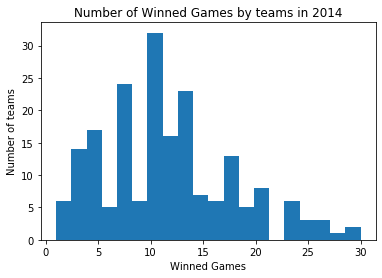

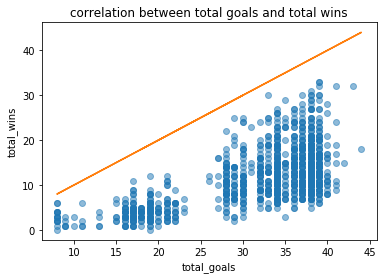

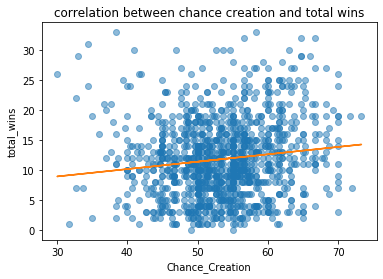

Text(0, 0.5, 'Attributes Value')

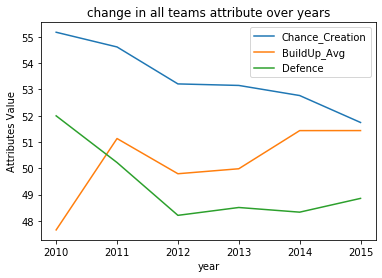

In [386]:
# 1D plotting
y=Team_To_Visualize['total_wins']
zee=Team_To_Visualize[Team_To_Visualize['year']==2014]
print(y.head())
plt.hist(zee['total_wins'],bins=20)
plt.ylabel('Number of teams')
plt.xlabel('Winned Games')
plt.title('Number of Winned Games by teams in 2014')
plt.show()
#there's a very strong correlation between total goals and total wins which is very obvious (team scores more goals wins more games)
plt.plot(Team_To_Visualize['total_goals'], y,'o',alpha=0.5)
plt.xlabel('total_goals')
plt.ylabel('total_wins')
slope, intercept= np.polyfit(Team_To_Visualize['total_goals'],Team_To_Visualize['total_goals'],1)
plt.plot(Team_To_Visualize['total_goals'],(Team_To_Visualize['total_goals']*slope+intercept))
plt.title('correlation between total goals and total wins')
plt.show()
# 2D Plotting the correlation between chance creation and total wins (Small correlation=0.13)
plt.plot(Team_To_Visualize['Chance_Creation'], y,'o',alpha=0.5)
plt.xlabel('Chance_Creation')
plt.ylabel('total_wins')
plt.title('correlation between chance creation and total wins')
# Visualizing best fit line
slope, intercept= np.polyfit(Team_To_Visualize['Chance_Creation'],Team_To_Visualize['total_wins'],1)
plt.plot(Team_To_Visualize['Chance_Creation'],(Team_To_Visualize['Chance_Creation']*slope+intercept))
plt.show()
# Plot shows there's no noticed trend in team attributes over years,except for a noticed increase in Build Up Average
x=Team_results.groupby('year')[['Chance_Creation','BuildUp_Avg','Defence']].mean()
x.plot(title='change in all teams attribute over years')
plt.ylabel('Attributes Value')


# conclusion

In [377]:
Correlation_Over_Years=Team_results.groupby('year')[['Chance_Creation','BuildUp_Avg','Defence','total_wins']].corr()
Correlation_Over_Years

Chance_Creation  BuildUp_Avg   Defence  total_wins
year                                                                    
2010 Chance_Creation         1.000000     0.465954  0.314732    0.224871
     BuildUp_Avg             0.465954     1.000000  0.442457    0.020901
     Defence                 0.314732     0.442457  1.000000   -0.033905
     total_wins              0.224871     0.020901 -0.033905    1.000000
2011 Chance_Creation         1.000000     0.202893  0.325139    0.277968
     BuildUp_Avg             0.202893     1.000000  0.034771    0.050920
     Defence                 0.325139     0.034771  1.000000    0.227925
     total_wins              0.277968     0.050920  0.227925    1.000000
2012 Chance_Creation         1.000000     0.205865  0.133199    0.020938
     BuildUp_Avg             0.205865     1.000000 -0.211402   -0.187550
     Defence                 0.133199    -0.211402  1.000000    0.175233
     total_wins              0.020938    -0.187550  0.175233    1.000000
2013 Chance_Creation         1.000000     0.222284  0.203487    0.076242
     BuildUp_Avg             0.222284     1.000000 -0.220124   -0.118908
     Defence                 0.203487    -0.220124  1.000000    0.279839
     total_wins              0.076242    -0.118908  0.279839    1.000000
2014 Chance_Creation         1.000000     0.294008  0.163284    0.114868
     BuildUp_Avg             0.294008     1.000000 -0.210321   -0.158359
     Defence                 0.163284    -0.210321  1.000000    0.228583
     total_wins              0.114868    -0.158359  0.228583    1.000000
2015 Chance_Creation         1.000000     0.313775  0.172944    0.061554
     BuildUp_Avg             0.313775     1.000000 -0.168513   -0.142819
     Defence                 0.172944    -0.168513  1.000000    0.395491
     total_wins              0.061554    -0.142819  0.395491    1.000000

## Most of the teams won 5-15 Matches, while only few teams won>25 Matches. Which makes sense because each league has only one winner. 
## There's Relatively small correlated ratio between chance creation and total wins (0.13), and (0.15) between Defence attributes and total wins. Build Up Attributes seems to be doesn't effect winning at all.
## Limitations:
## It seems that the data of team results added to fifa is not based on real life, Maybe it become more precise and real-life related in the last few years, but we cannot determine that as most of the data is measured 2011-2015. We need to get more updated data. Although change in correlation between total wins and Chance Creation seems random over years, but it looks that defence becomes more correlated with total wins over years. 